In [94]:
import numpy as np
import pandas as pd
f =  'C:\\Users\\Connor\\DS001Project\\2017-10-19- Synthetic recidivism.csv'
data = pd.read_csv(f)
data.columns, data.shape

(Index(['defendantid', 'gender', 'race', 'category', 'MajorGroupDetail',
        'AgeAtFirst', 'OrderProtect', 'Housing', 'Age', 'MisdConviction',
        'FelonyConviction', 'ViolentConviction', 'ViolentOffense', 'Gang',
        'BWO24', 'BWO24Plus', 'Arrests', 'FelArrests', 'MisdArrests',
        'ViolArrests', 'Arrests5', 'FelArrests5', 'MisdArrests5',
        'ViolArrests5', 'Arrests10', 'FelArrests10', 'MisdArrests10',
        'ViolArrests10', 'Cvts', 'FelCvts', 'MisdCvts', 'ViolCvts', 'DrugCvts',
        'DrugFelCvts', 'SexCvts', 'BurgFelCvts', 'RobFelCvts', 'LarcFelCvts',
        'AssFelCvts', 'WeapFelCvts', 'CvtTypes', 'Cvts5', 'CvtCounties',
        'FelCvts5', 'MisdCvts5', 'ViolCvts5', 'DrugCvts5', 'CvtTypes5',
        'CvtCounties5', 'Cvts9', 'FelCvts9', 'MisdCvts9', 'ViolCvts9',
        'DrugCvts9', 'CvtTypes9', 'CvtCounties9', 'Cvts10', 'FelCvts10',
        'MisdCvts10', 'ViolCvts10', 'DrugCvts10', 'CvtTypes10', 'CvtCounties10',
        'Incarcerations', 'Jail', 'Prison', 

In [95]:


target = ['NewViolArrest36']

to_drop = ['defendantid','race','gender','category','MajorGroupDetail','NewArrests36',
           'NewFelArrests36','NewMisdArrests36','NewViolArrests36','NewArrest36',
            'NewFelArrest36','NewMisdArrest36','NewArrest36Type']


data.drop(to_drop,axis=1,inplace=True)
data = data.dropna(axis=0)

rnd = np.random.random_sample(len(data))<.8
rnd
train_df = data[rnd]
test_df = data[~rnd]

train_y = train_df[target]
train_df = train_df.drop(target,
                         axis=1)



test_y = test_df[target]
test_df = test_df.drop(target,
                         axis=1)

train_df.head()

,AgeAtFirst,OrderProtect,Housing,Age,MisdConviction,FelonyConviction,ViolentConviction,ViolentOffense,Gang,BWO24,...,Jail,Prison,Incarcerations5,Jail5,Prison5,Incarcerations10,Jail10,Prison10,CareerLength,CvtDensity
1,30.0,0,0,42.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12.0,0.000000
3,33.0,0,1,54.0,1,1,0,0,0,1,...,50,1,4,4,0,11,11,0,23.0,1.693979
5,16.0,1,0,55.0,1,1,1,0,0,1,...,66,4,13,13,0,30,30,0,40.0,1.500000
6,32.0,1,0,55.0,1,1,0,0,0,0,...,4,0,0,0,0,0,0,0,24.0,0.763763
7,17.0,0,0,34.0,1,1,0,0,0,1,...,1,1,0,0,0,0,0,0,17.0,0.641689


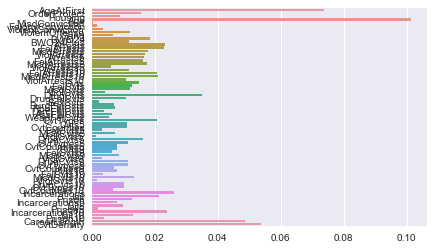

In [96]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy')#,random_state=100,    max_depth=3,min_samples_leaf=5
clf.fit(train_df,train_y)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

i = dict(zip(train_df.columns.values, clf.feature_importances_))
i
sns.barplot(clf.feature_importances_,train_df.columns.values)


In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score


test_pred = clf.predict(test_df)
cm = accuracy_score(test_y,test_pred)
cm
print(data.head())

   AgeAtFirst  OrderProtect  Housing   Age  MisdConviction  FelonyConviction  \
1        30.0             0        0  42.0               0                 0   
2        23.0             1        0  30.0               1                 0   
3        33.0             0        1  54.0               1                 1   
4        18.0             0        0  24.0               1                 1   
5        16.0             1        0  55.0               1                 1   

   ViolentConviction  ViolentOffense  Gang  BWO24       ...         Prison  \
1                  0               0     0      0       ...              0   
2                  0               0     0      1       ...              0   
3                  0               0     0      1       ...              1   
4                  0               0     0      1       ...              0   
5                  1               0     0      1       ...              4   

   Incarcerations5  Jail5  Prison5  Incarcerations

In [98]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline


rng1 = np.arange(30,50,1)
rng2 = np.arange(2,100,10)


param_grid = {'min_samples_split': rng1,
              'min_samples_leaf': rng2}

param_grid
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid,cv=2)
grid_search.fit(train_df,train_y)


IndexError: too many indices for array

In [85]:
r= pd.DataFrame(grid_search.cv_results_)


r = r.melt(id_vars=['param_min_samples_leaf','param_min_samples_split'])
r = pd.DataFrame(r.query('variable=="mean_test_score"'))
r.drop(r.columns[[2]],axis=1,inplace=True)
r = r.pivot(index="param_min_samples_leaf",columns="param_min_samples_split",values="value")
r = r[r.columns].astype(float)


sns.heatmap(r,annot=True)


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'